First 5 rows of the dataset:
    Latitude  Longitude  Ground_Displacement_mm  Rainfall_mm_week  \
0  12.472407  87.926469                6.243907        163.354091   
1  47.042858  81.443855                0.000000        134.753016   
2  33.919637  72.381105                7.661385        220.810868   
3  25.919509  92.551801                9.274100        245.670232   
4  -0.638882  87.389247                8.918533         71.401054   

   Slope_Angle_deg  Proximity_to_River_m  Water_Table_Depth_m  label  
0        10.936825            820.530421             9.467678      1  
1        24.168944           1679.598642             3.792509      0  
2         9.952796           1700.418459            10.953913      0  
3        32.600560            809.158197            13.670666      0  
4        25.824398           1300.778493            11.687333      0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column

C:\Users\TEJASWINI\anaconda3\desktop\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TEJASWINI\anaconda3\desktop\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TEJASWINI\anaconda3\desktop\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


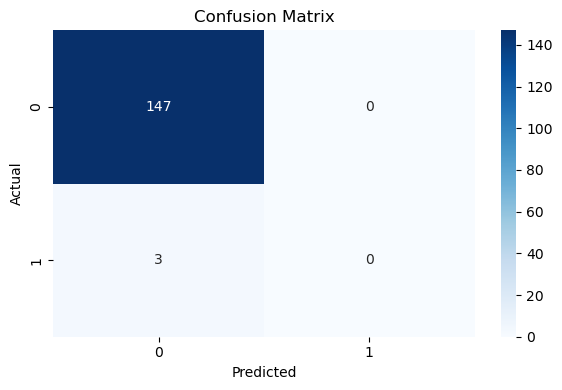

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = r"D:\Dataset.csv"  
data = pd.read_csv(file_path)
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset Info:")
print(data.info())
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()